<a href="https://colab.research.google.com/github/reyanshgupta/ImageCompressionTechniques/blob/main/Image_Compression_Techniques_KMeans%2C_DCT%2C_Hadamard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import os
import sys
from sympy import fwht
from sympy import ifwht
import sympy as sp

**Using KMeans**

In [ ]:
def KMeans_Compression():
  def init_centroids(num_clusters,image):
    image = image/255 #normalize pixel values to 0/1 from 255
    H,W,C = image.shape
    numbers = np.random.randint(H*W,size=num_clusters) #random centroids
    centroids_init = image.reshape(-1,C)[numbers] #2D array with C color channels
    return centroids_init

  def update_centroids(centroids, image, max_iter=30,print_every=10):
    image=image/255
    num_of_clusters=len(centroids) #each centroid is one cluster
    H,W,C = image.shape
    image = image.reshape(-1,C)
    dist = np.empty([num_of_clusters, H*W]) #to store distance between each pixel and cluster center/centroid

    for i in range(max_iter):
      for j in range(num_of_clusters):
        dist[j]=np.sum((image-centroids[j])**2, axis=1) #calculating euclidean distance
      clustering = np.argmin(dist,axis=0).reshape(-1,1)
      new_centroids = np.empty([num_of_clusters, C])

      for j in range(num_of_clusters):
              cluster_j = (clustering == j)
              new_centroids[j] = np.sum(cluster_j * image, axis=0) / np.sum(cluster_j)

      if (i + 1) % print_every == 0: #calculate loss every x no of steps later
            loss = (image - new_centroids[clustering.squeeze()]) ** 2 #MSE
            loss = np.sum(loss)
            print(f'loss: {loss:.2f}')

      if np.array_equal(centroids, new_centroids):
              break
      centroids = new_centroids

    return new_centroids

  def update_image(image,centroids):
    image=image/255
    num_of_clusters=len(centroids)
    H,W, C = image.shape
    image = image.reshape(-1, C)
    distance = np.empty([num_of_clusters, H * W])
    for j in range(num_of_clusters):
      distance[j] = np.sum((image-centroids[j])**2,axis=1)
    clustering = np.argmin(distance,axis=0) #assigning pixel to closest cluster center
    new_image=centroids[clustering].reshape(H,W,C) #image segmentation done using KMeans
    return new_image
    return image

  def main():
    image_path = "hoover.jpg"
    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image,(0,0),fx=0.1,fy=0.1)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # num_clusters = 5  can play around with this
    num_clusters = 20
    centroids = init_centroids(num_clusters, original_image)
    updated_centroids = update_centroids(centroids, original_image, max_iter=30, print_every=10)
    compressed_image = update_image(original_image, updated_centroids)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image)
    plt.title('Compressed Image')
    plt.axis('off')

    plt.show()


    #Showing size

    original_image_size = os.path.getsize(image_path)
    original_image_size_kb = original_image_size / 1024

    # Here, we're converting the image array to bytes to simulate the size of the compressed image
    compressed_image_size_bytes = len(cv2.imencode('.jpg', compressed_image)[1]) #encodes image to jpg and then len(index [1]) returns the size
    compressed_image_size_kb = compressed_image_size_bytes / 1024

    print(f"Original Image Size: {original_image_size_kb:.2f} KB")
    print(f"Compressed Image Size: {compressed_image_size_kb:.2f} KB")

  if __name__ == '__main__':
      main()



loss: 586.58
loss: 547.73
loss: 505.67


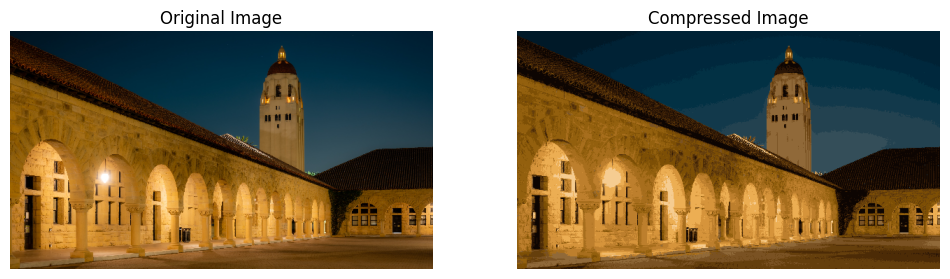

Original Image Size: 2012.38 KB
Compressed Image Size: 5.46 KB


In [ ]:
KMeans_Compression()

**Using DCT**

In [ ]:
def DCT_Grayscale_Compression():

  def apply_dct(image):
      image_float32 = np.float32(image)
      return cv2.dct(image_float32)

  def apply_inverse_dct(dct_image):
      return cv2.idct(dct_image)

  def compression(intensity, dct_image):
      compressed_image = dct_image.copy()
      row, col = dct_image.shape

      for r in range(intensity, row):
          for c in range(intensity, col):
              compressed_image[r][c] = 0.0

      return compressed_image

  def main():
      image_path = "hoover.jpg"
      original_image = cv2.imread(image_path)
      original_image = cv2.resize(original_image, (0, 0), fx=0.1, fy=0.1)

      grayscale_image = cv2.imread(image_path,0)
      dct_image = apply_dct(grayscale_image)
      intensity = 70
      compressed_dct_image = compression(intensity, dct_image)
      compressed_image = apply_inverse_dct(compressed_dct_image)

      plt.figure(figsize=(12, 6))
      plt.subplot(1, 2, 1)
      plt.imshow(grayscale_image, cmap='gray')
      plt.title('Original Grayscale Image')
      plt.axis('off')

      plt.subplot(1, 2, 2)
      plt.imshow(compressed_image, cmap='gray')
      plt.title('Compressed Image')
      plt.axis('off')

      plt.show()

      # Showing size
      grayscale_image_size_bytes = sys.getsizeof(grayscale_image)
      grayscale_image_size_kb = grayscale_image_size_bytes / 1024

      # Here, we're converting the compressed image array to bytes to simulate the size
      # of the compressed image (You may want to save the image with an appropriate format)
      compressed_image_bytes = cv2.imencode('.jpg', compressed_image)[1]
      compressed_image_size_bytes = len(compressed_image_bytes)
      compressed_image_size_kb = compressed_image_size_bytes / 1024

      print(f"Original Image Size: {grayscale_image_size_kb:.2f} KB")
      print(f"Compressed Image Size: {compressed_image_size_kb:.2f} KB")

  if __name__ == '__main__':
      main()


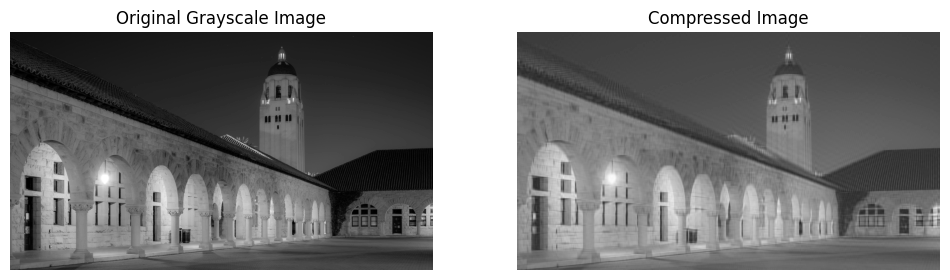

Original Image Size: 20093.19 KB
Compressed Image Size: 1973.99 KB


In [ ]:
DCT_Grayscale_Compression()

In [ ]:
def DCT_Colored_Compression():
  def apply_dct(image):
    image_float32 = np.float32(image)
    return cv2.dct(image_float32)

  def compression(intensity, dct_image):
    compressed_image = dct_image.copy()
    row, col = dct_image.shape

    for r in range(intensity, row):
        for c in range(intensity, col):
            compressed_image[r][c] = 0.0

    return compressed_image

  def apply_inverse_dct(dct_image):
    return cv2.idct(dct_image)

  def main():
    image_path = "hoover.jpg"
    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image, (0, 0), fx=0.1, fy=0.1)

    # Separate the RGB channels
    blue, green, red = cv2.split(original_image)

    # Apply DCT and compression for each channel
    blue_dct = apply_dct(blue)
    green_dct = apply_dct(green)
    red_dct = apply_dct(red)

    intensity = 30

    # Compress each channel separately
    blue_compressed_dct = compression(intensity, blue_dct)
    green_compressed_dct = compression(intensity, green_dct)
    red_compressed_dct = compression(intensity, red_dct)

    # Apply inverse DCT for each channel
    blue_compressed = apply_inverse_dct(blue_compressed_dct)
    green_compressed = apply_inverse_dct(green_compressed_dct)
    red_compressed = apply_inverse_dct(red_compressed_dct)

    # Merge the compressed channels back into an RGB image
    compressed_image = cv2.merge((blue_compressed, green_compressed, red_compressed))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original RGB Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB))
    plt.title('Compressed Image')
    plt.axis('off')

    plt.show()

    # Showing size
    original_image_size = os.path.getsize(image_path)
    original_image_size_kb = original_image_size / 1024

    # Here, we're converting the compressed image array to bytes to simulate the size
    # of the compressed image (You may want to save the image with an appropriate format)
    compressed_image_bytes = cv2.imencode('.jpg', compressed_image)[1]
    compressed_image_size_bytes = len(compressed_image_bytes)
    compressed_image_size_kb = compressed_image_size_bytes / 1024

    print(f"Original Image Size: {original_image_size_kb:.2f} KB")
    print(f"Compressed Image Size: {compressed_image_size_kb:.2f} KB")

  if __name__ == '__main__':
    main()

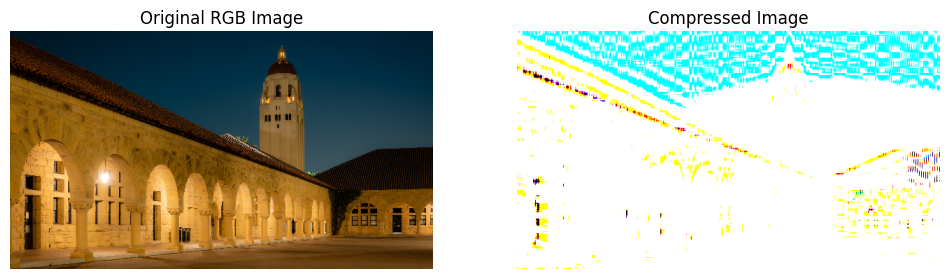

Original Image Size: 2012.38 KB
Compressed Image Size: 58.65 KB


In [ ]:
DCT_Colored_Compression()


**Using Hadamard Transform**

In [ ]:
def Hadamard_Grayscale():
  def calculate_x(image):
    reshaped_image = image.reshape(-1)
    x = reshaped_image.shape
    x = int(x[0])
    return x

  def apply_hadamard(image,x):
    reshaped_image = image.reshape(-1)
    hadamard_image = fwht(reshaped_image)
    hadamard_image = hadamard_image[0:x]
    final_hadamard = np.reshape(hadamard_image,image.shape)
    return final_hadamard

  def apply_inverse_hadamard(hadamard_image,x):
    reshaped_image = hadamard_image.reshape(-1)
    inverse_hoover = ifwht(reshaped_image)
    inverse_hoover = inverse_hoover[0:x]
    final_inverse = np.reshape(inverse_hoover,hadamard_image.shape)
    return final_inverse

  def compression(intensity,hadamard_image,x):
    reshaped_image = hadamard_image.reshape(-1)
    row,col = hadamard_image.shape
    compressed_image=hadamard_image.copy()
    for r in range(intensity, row):
          for c in range(intensity, col):
              compressed_image[r][c] = 0.0
    return compressed_image

  def main():
      image = cv2.imread('hoover.jpg', 0)  # Load the image in grayscale mode
      image = cv2.resize(image, (0, 0), fx=0.1, fy=0.1)
      x = calculate_x(image)
      hadamard = apply_hadamard(image, x)
      inverse_hadamard = apply_inverse_hadamard(hadamard, x)
      compressed_image = compression(100, hadamard, x)
      final = apply_inverse_hadamard(compressed_image, x)
      final = final.astype(np.uint8)

      # Display the original and compressed images
      plt.figure(figsize=(12, 6))
      plt.subplot(1, 2, 1)
      plt.imshow(image, cmap='gray')
      plt.title('Original Grayscale Image')
      plt.axis('off')

      plt.subplot(1, 2, 2)
      plt.imshow(final, cmap='gray')
      plt.title('Compressed Image')
      plt.axis('off')

      # Showing size
      grayscale_image_size_bytes = sys.getsizeof(image)
      grayscale_image_size_kb = grayscale_image_size_bytes / 1024

      compressed_image_bytes = cv2.imencode('.jpg', final)[1]
      compressed_image_size_bytes = len(compressed_image_bytes)
      compressed_image_size_kb = compressed_image_size_bytes / 1024

      print(f"Original Image Size: {grayscale_image_size_kb:.2f} KB")
      print(f"Compressed Image Size: {compressed_image_size_kb:.2f} KB")

      plt.show()

  if __name__ == '__main__':
      main()

Original Image Size: 201.00 KB
Compressed Image Size: 88.31 KB


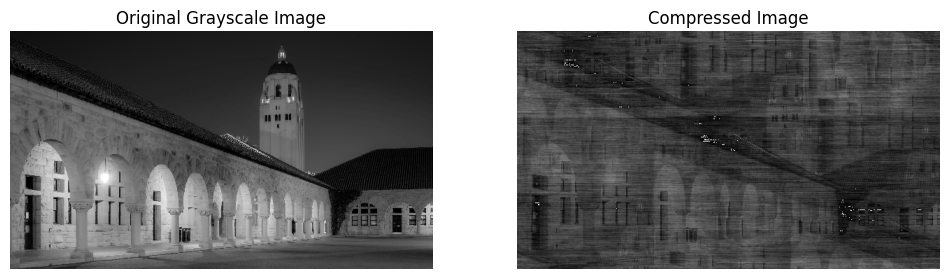

In [ ]:
Hadamard_Grayscale()

In [ ]:
def Hadamard_Colored():

  def calculate_x(image):
      reshaped_image = image.reshape(-1)
      x = reshaped_image.shape[0]
      return x

  def apply_hadamard(image, x):
      reshaped_image = image.reshape(-1)
      hadamard_image = fwht(reshaped_image)
      hadamard_image = hadamard_image[:x]
      final_hadamard = np.reshape(hadamard_image, image.shape)
      return final_hadamard

  def apply_inverse_hadamard(hadamard_image, x):
      reshaped_image = hadamard_image.reshape(-1)
      inverse_hoover = ifwht(reshaped_image)
      inverse_hoover = inverse_hoover[:x]
      final_inverse = np.reshape(inverse_hoover, hadamard_image.shape)
      return final_inverse

  def compression(intensity, hadamard_image, x):
      row, col, channels = hadamard_image.shape
      compressed_image = hadamard_image.copy()

      for channel in range(channels):
          for r in range(intensity, row):
              for c in range(intensity, col):
                  compressed_image[r, c, channel] = 0.0

      return compressed_image

  def main():
      image = cv2.imread('hoover.jpg')  # Load the color image
      image = cv2.resize(image, (0, 0), fx=0.1, fy=0.1)
      x = calculate_x(image)
      hadamard = apply_hadamard(image, x)
      inverse_hadamard = apply_inverse_hadamard(hadamard, x)
      compressed_image = compression(100, hadamard, x)
      final = apply_inverse_hadamard(compressed_image, x)
      final = final.astype(np.uint8)

      # Display the original and compressed color images
      plt.figure(figsize=(12, 6))
      plt.subplot(1, 2, 1)
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Display the original color image
      plt.title('Original Color Image')
      plt.axis('off')

      plt.subplot(1, 2, 2)
      plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))  # Display the compressed color image
      plt.title('Compressed Color Image')
      plt.axis('off')

      # Showing size
      original_image_size = os.path.getsize('hoover.jpg')
      original_image_size_kb = original_image_size / 1024

      # Saving the compressed image temporarily to get its size
      cv2.imwrite('compressed_color_hadamard.jpg', final)
      compressed_image_size = os.path.getsize('compressed_color_hadamard.jpg')
      compressed_image_size_kb = compressed_image_size / 1024

      print(f"Original Image Size: {original_image_size_kb:.2f} KB")
      print(f"Compressed Image Size: {compressed_image_size_kb:.2f} KB")

      plt.show()

  if __name__ == '__main__':
      main()

Original Image Size: 2012.38 KB
Compressed Image Size: 115.72 KB


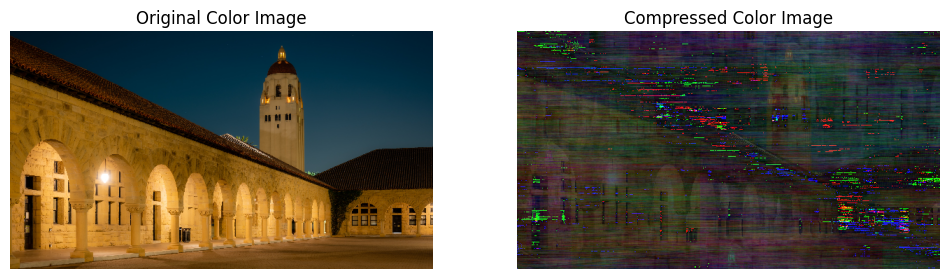

In [ ]:
Hadamard_Colored()